In [1]:
import sys
sys.path.append("..")

from generation import AnomalyGenerator
from data.data_loader import normalised_subspace, loader, subspace, scaler


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import scienceplots
plt.style.use('science')

In [2]:
# Load and preprocess data

X = normalised_subspace()
df = loader()[subspace]

In [6]:
anom_gen = AnomalyGenerator()
labels = anom_gen.model.predict(X)

df["labels"] = labels
df["label_scores"] = anom_gen.model.predict_proba(X).max(axis=1) # Scores of the labels in class - log-likelihood.

Sampling from the GMM

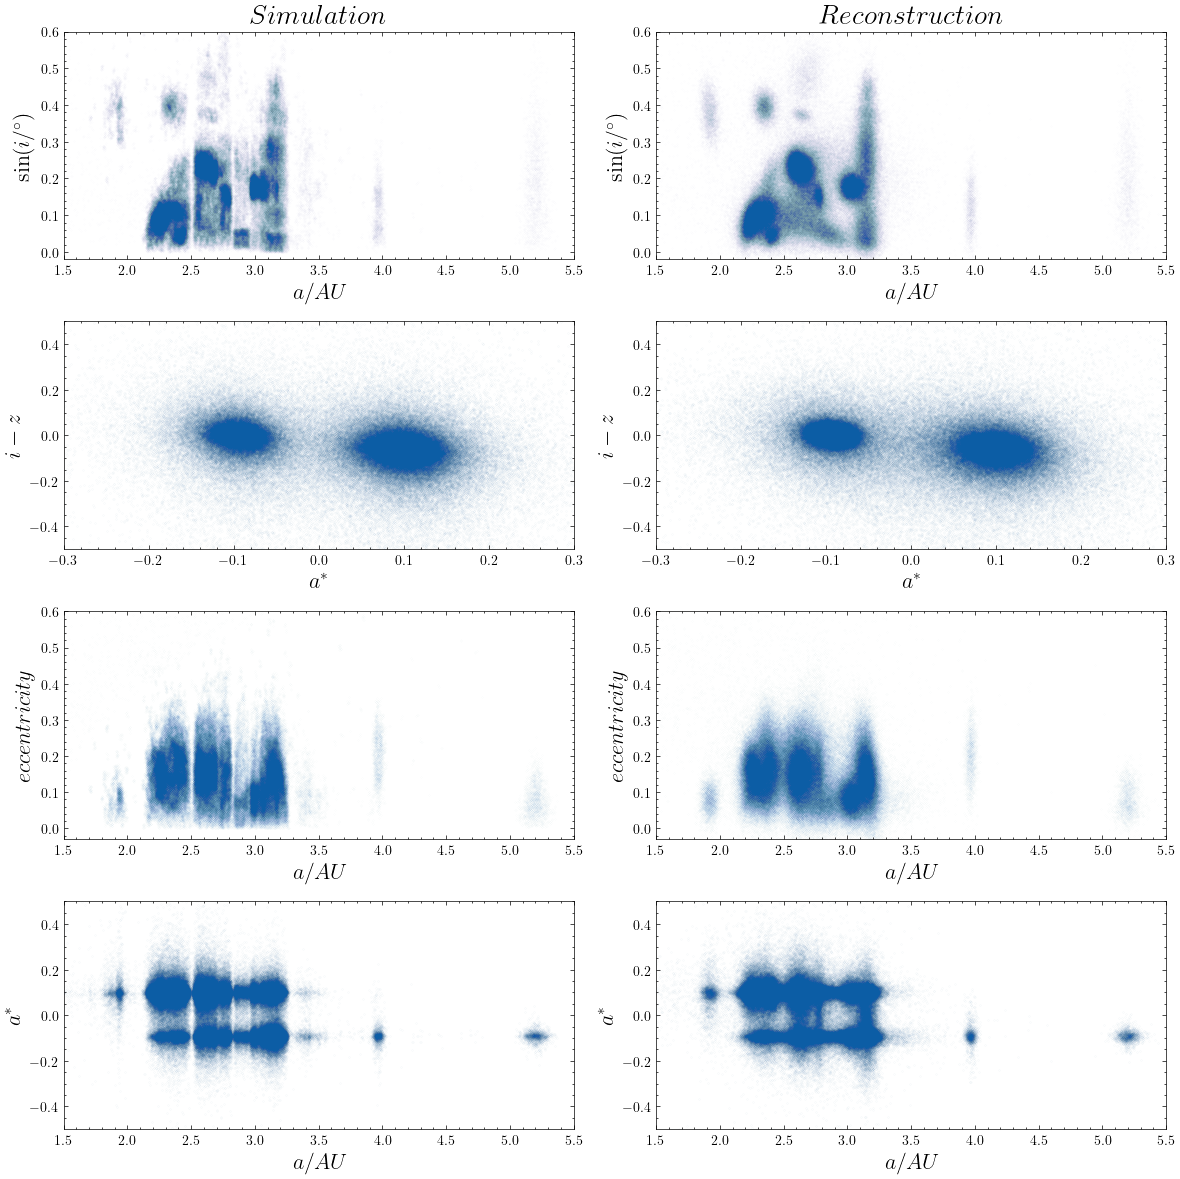

In [4]:
fig, axs = plt.subplots(4, 2, figsize=(12, 12))

#fig.suptitle("Comparison of simualtion with the GMM reconstruction.")

samples = scaler.inverse_transform(anom_gen.model.sample(len(df))[0])

axs[0][0].set_title(r"$Simulation$", fontsize=20)
axs[0][1].set_title(r"$Reconstruction$", fontsize=20)

axs[0][0].scatter(
    df["a"],
    df["sini"],
    s=1e-4,
    alpha=.5,
)
axs[0][1].scatter(
    samples[:, 2],
    samples[:, 3],
    s=1e-4,
    alpha=.5,
)

axs[0][0].set_xlabel(r"$a / AU$", fontsize=16)
axs[0][1].set_xlabel(r"$a / AU$", fontsize=16)

axs[0][0].set_ylabel(r"$\sin(i / ^\circ)$", fontsize=16)
axs[0][1].set_ylabel(r"$\sin(i / ^\circ)$", fontsize=16)

'''axs[0][0].set_title("Simulation", fontsize=20)
axs[0][1].set_title("GMM reconstruction", fontsize=20)'''

axs[1][0].scatter(
    df["a*"],
    df["i-z"],
    s=0.001,
    alpha=.5,
)

axs[1][1].scatter(
    samples[:, 0],
    samples[:, 1],
    s=0.001,
    alpha=.5,
)

axs[1][0].set_xlabel(r"$a^*$", fontsize=16)
axs[1][1].set_xlabel(r"$a^*$", fontsize=16)

axs[1][0].set_ylabel(r"$i - z$", fontsize=16)
axs[1][1].set_ylabel(r"$i - z$", fontsize=16)
'''
axs[1][0].set_title("Simulation")
axs[1][1].set_title("GMM reconstruction")'''

axs[2][0].scatter(
    df["a"],
    df["e"],
    s=0.001,
    alpha=.25,
)
axs[2][1].scatter(
    samples[:, 2],
    samples[:, 4],
    s=0.001,
    alpha=.25,
)

axs[3][0].scatter(
    df["a"],
    df["a*"],
    s=0.001,
    alpha=.5,
)
 
axs[3][1].scatter(
    samples[:, 2],
    samples[:, 0],
    s=0.001,
    alpha=.5,
)

axs[2][0].set_xlabel(r"$a / AU$", fontsize=16)
axs[2][1].set_xlabel(r"$a / AU$", fontsize=16)

axs[2][0].set_ylabel(r"$eccentricity$", fontsize=16)
axs[2][1].set_ylabel(r"$eccentricity$", fontsize=16)



'''
axs[2][0].set_title("Simulation")
axs[2][1].set_title("GMM reconstruction")'''

axs[3][0].set_xlabel(r"$a / AU$", fontsize=16)
axs[3][1].set_xlabel(r"$a / AU$", fontsize=16)

axs[3][0].set_ylabel(r"$a^*$", fontsize=16)
axs[3][1].set_ylabel(r"$a^*$", fontsize=16)

'''axs[3][0].set_title("Simulation")
axs[3][1].set_title("GMM reconstruction")'''

axs[1][0].set_xlim(-.3, .3)
axs[1][1].set_xlim(-.3, .3)
axs[1][0].set_ylim(-.5, .5)
axs[1][1].set_ylim(-.5, .5)

axs[0][0].set_ylim(-0.02,.6)
axs[0][1].set_ylim(-0.02,.6)
axs[0][0].set_xlim(1.5,5.5)
axs[0][1].set_xlim(1.5,5.5)

axs[2][0].set_xlim(1.5,5.5)
axs[2][1].set_xlim(1.5,5.5)
axs[2][0].set_ylim(-.03, .6)
axs[2][1].set_ylim(-.03, .6)

axs[3][0].set_xlim(1.5,5.5)
axs[3][1].set_xlim(1.5,5.5)
axs[3][0].set_ylim(-.5, .5)
axs[3][1].set_ylim(-.5, .5)

plt.tight_layout()
plt.savefig("recon.png", dpi=600)

56


(-0.03, 0.7)

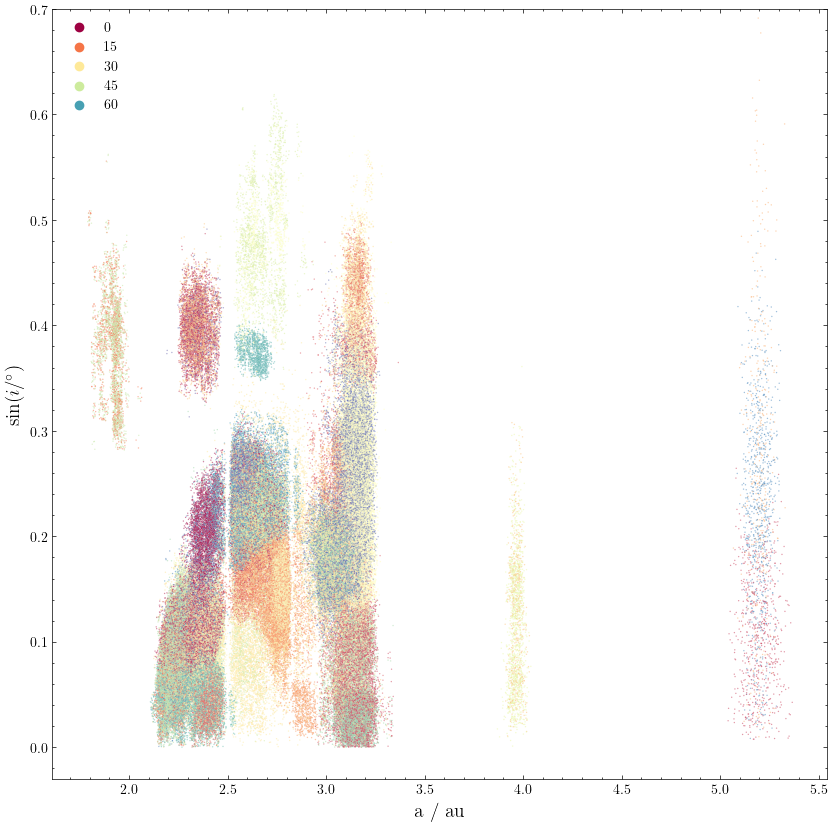

In [47]:
grouped = df.groupby(["labels"])

cleaned = grouped.filter(lambda x:x["a"].std() <= .1)
print(len(cleaned["labels"].unique()))

fig, ax = plt.subplots(figsize=(10,10))

'''ax.set_ylabel(r'$\sin$(i / $\degree$)')'''
#ax.set_title('Color visualised across the inner solar system')

g = sns.scatterplot(
    data=cleaned,
    x="a",
    y="sini",
    palette="Spectral",
    hue=anom_gen.model.predict(scaler.transform(cleaned[subspace].to_numpy())),
    s=1,
    alpha=.5,
    ax=ax
)
ax.set_ylabel(r"$\sin(i / ^\circ)$", fontsize=14)
ax.set_xlabel('a / au', fontsize=14)

ax.set_ylim(-.03, .7)

In [30]:
grouped = df.groupby(["labels"])
'''cleaned = grouped.filter(lambda x:x["a"].std() < .05) # Robust defintion here.
len(cleaned["labels"].unique())'''
means = grouped.apply(lambda x:x[subspace].mean()).to_numpy()
covs = grouped.apply(lambda x:x[subspace].cov()).to_numpy().reshape(len(grouped), len(means[0]), len(means[0]))
stds = np.sqrt([np.diagonal(cov) for cov in covs])


In [31]:
grouped.apply(lambda x:x[subspace].mean())[(grouped.apply(lambda x:x[subspace].mean())["a"] < 2.7) & (grouped.apply(lambda x:x[subspace].mean())["a"] >= 2.6)]

,a*,i-z,a,sini,e
labels,,,,,
0,0.111580,-0.095147,2.602526,0.240483,0.133811
4,0.099912,-0.054617,2.631150,0.176183,0.185375
21,0.100074,-0.070675,2.645721,0.220069,0.082940
23,-0.107392,-0.001438,2.616543,0.213673,0.167276
25,0.031395,-0.037407,2.664301,0.484200,0.182478
31,0.022632,-0.035890,2.680327,0.473121,0.271936
35,0.100187,-0.058361,2.691215,0.074800,0.088464
36,0.099446,-0.056176,2.613255,0.235380,0.142002
37,-0.040969,-0.054791,2.655243,0.093325,0.210911
